<a href="https://colab.research.google.com/github/Julian27R/Trabajos/blob/main/Detector_Musica_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar modelo base de datos canciones**

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import joblib

# Ruta al archivo del modelo en Google Colab
ruta_al_modelo = '/content/drive/My Drive/Modelo/reggaeton_vs_salsa.pkl'  # Ajusta la ruta y el nombre del archivo según tu ubicación

# Carga el modelo desde el archivo .pkl
modelo_cargado = joblib.load(ruta_al_modelo)
modelo_cargado.keys()
base_datos = modelo_cargado['Xw_']
genero_bd = modelo_cargado['label']
print('Tamaño base de datos: ',base_datos.shape)
print('Tamaño del label generos: ',genero_bd.shape)

Tamaño base de datos:  (140, 120001)
Tamaño del label generos:  (140, 1)


# Descargar mp3 videos youtube

In [58]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.1.0-py3-none-any.whl (104 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (142 kB)
  Using cached idna-3.4-py3-none-

In [64]:
import os
import yt_dlp as youtube_dl
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

## Lista links videos y nombres salida mp3

In [65]:
link_= ["https://www.youtube.com/watch?v=oD5f55ohsc4=Feid",
        'https://www.youtube.com/watch?v=Q0obZUZBVdM=BLESSD',
        'https://www.youtube.com/watch?v=pz9O3UeM_o0=Adolescents_Orquesta'
       ]
name_ = ['feid',
         'blessd',
         'adolescents'
        ]
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

feid
[youtube] Extracting URL: https://www.youtube.com/watch?v=oD5f55ohsc4=Feid
[youtube] oD5f55ohsc4: Downloading webpage
[youtube] oD5f55ohsc4: Downloading ios player API JSON
[youtube] oD5f55ohsc4: Downloading android player API JSON
[youtube] oD5f55ohsc4: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=oD5f55ohsc4
[youtube] oD5f55ohsc4: Downloading webpage
[youtube] oD5f55ohsc4: Downloading ios player API JSON
[youtube] oD5f55ohsc4: Downloading android player API JSON
[youtube] oD5f55ohsc4: Downloading m3u8 information
[info] oD5f55ohsc4: Downloading 1 format(s): 251
[download] feid.mp3 has already been downloaded
[download] 100% of    2.88MiB
Download complete... feid.mp3
blessd
[youtube] Extracting URL: https://www.youtube.com/watch?v=Q0obZUZBVdM=BLESSD
[youtube] Q0obZUZBVdM: Downloading webpage
[youtube] Q0obZUZBVdM: Downloading ios player API JSON
[youtube] Q0obZUZBVdM: Downloading android player API JSON
[youtube] Q0obZUZBVdM: Downloading

In [8]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('Pruebas')
except:
  print("Carpeta Pruebas ya existe")

#recorrer excel con videos
N = len(link_)
print(N)
Ns = N * 5 #cantidad de segmentos por cancion
for n in range(N):
    name_rout = 'Pruebas/'+name_[n]
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(link_[n],name_rout)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_rout+'.mp3',
                   name_rout+'.wav'])

3
[youtube] Extracting URL: https://www.youtube.com/watch?v=oD5f55ohsc4=Feid
[youtube] oD5f55ohsc4: Downloading webpage
[youtube] oD5f55ohsc4: Downloading ios player API JSON
[youtube] oD5f55ohsc4: Downloading android player API JSON
[youtube] oD5f55ohsc4: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=oD5f55ohsc4
[youtube] oD5f55ohsc4: Downloading webpage
[youtube] oD5f55ohsc4: Downloading ios player API JSON
[youtube] oD5f55ohsc4: Downloading android player API JSON
[youtube] oD5f55ohsc4: Downloading m3u8 information
[info] oD5f55ohsc4: Downloading 1 format(s): 251
[download] Destination: Pruebas/feid.mp3
[download] 100% of    2.88MiB in 00:00:00 at 14.82MiB/s  
Download complete... Pruebas/feid.mp3
[youtube] Extracting URL: https://www.youtube.com/watch?v=Q0obZUZBVdM=BLESSD
[youtube] Q0obZUZBVdM: Downloading webpage
[youtube] Q0obZUZBVdM: Downloading ios player API JSON
[youtube] Q0obZUZBVdM: Downloading android player API JSON
[youtube] Q0obZ

# Convertir mp3 a wav

In [90]:
import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])
'''#cargar .wavs y partir audios
#lista archivos .wav'''
path = 'Pruebas/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['blessd.wav', 'feid.wav', 'adolescents.wav']

# Leer wav en numpy

In [91]:
!pip install soundfile #instalar sondfile

# Guardar canciones .wav en lista

In [92]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
for name in name_:
    nombre_out = "output.wav"
    x, fs = sf.read(name+'.wav')

    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,name+'.wav'))

Frecuencia de muestreo 48000.00[Hz]
audio feid.wav
Frecuencia de muestreo 48000.00[Hz]
audio blessd.wav
Frecuencia de muestreo 48000.00[Hz]
audio adolescents.wav


# Lectura de canciones de prueba

In [162]:
import soundfile as sf
import numpy as np
 # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
ti = 40 #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*(ti) #cantidad segmentos
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    x_t = x[int(fs):int(fs*(ts)),:]
    print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
    i+=1
x_t.shape

0 lectura: blessd.wav; segundo 40:45; tipo música [0.]
1 lectura: feid.wav; segundo 40:45; tipo música [0.]
2 lectura: adolescents.wav; segundo 40:45; tipo música [0.]


(192000, 2)

#Reproduccion de un segmento de cancion

In [161]:
from IPython.display import Audio #reproducir segmento
i = 1
Audio(x_t[i].T,rate=fs)

In [103]:
#IMPORTANDO LIBRERÍAS
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#Calculo de Fourier a los segmentos de las canciones

In [104]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
zt_m = np.abs(Xw)    #Valor de la magnitud
name_c.append(zt_m)
Xw.shape

(21, 120001)

#Espectro de Frecuencia

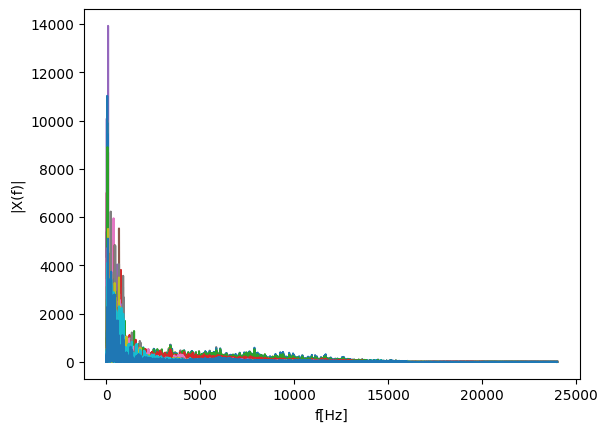

In [105]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#Normalización de Espectros

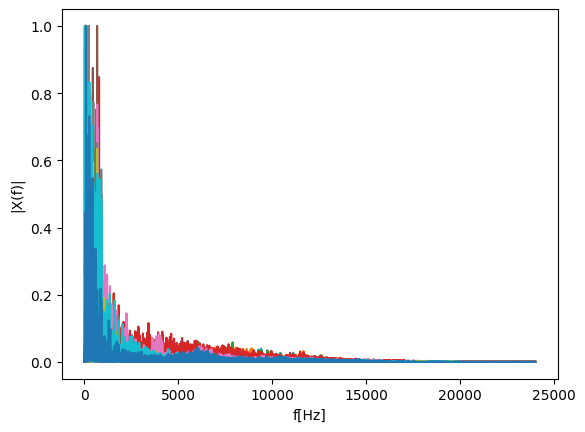

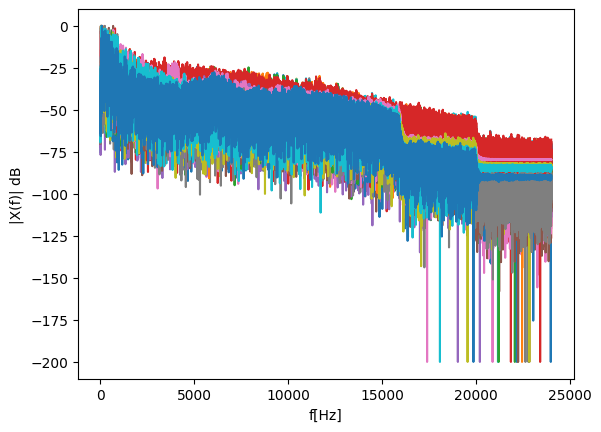

In [106]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

#Calculo de distancias de canciones de prueba con respecto a la base de datos

In [165]:
from scipy.spatial.distance import cdist

distancias=cdist(base_datos,Xw_)
print("Distancias: ",distancias)
distancias.shape
ind=np.argmin(distancias,axis=0)
ind.shape
print("indices: ",ind)
canciones= base_datos[ind]
print("canciones ",canciones)

'''distances = []
for canbd in canciones:
  distances.append(np.linalg.norm(canbd - zt_m))
  min_distance_index = np.argmin(distances)'''

distancias=[]
i=0
for i in ind:#lectura audio .wav
    x, fs = sf.read(path+name)
    distancias.append(np.linalg.norm(i - zt_m))
    min_distance_index = np.argmin(distancias)
    print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
    i+=1



if min_distance_index < 10:
  print('La cancion pertenece al genero de REGGAETON')
else:
  print('La cancion pertenece al genero de SALSA')
print(f"posicion {min_distance_index} ")
#print('indices_canciones: ', min_distance_index)
canciones.shape

Distancias:  [[ 8.76018487  9.2206754   8.45910356 ...  7.58426454  9.34324565
   7.18474227]
 [ 9.08179856  9.74215553  8.87908657 ...  7.708127    9.2850389
   8.14437553]
 [10.13246481 10.66953277  9.74752169 ...  9.63810285 10.54553626
   9.82025977]
 ...
 [10.24529821 10.95764174 10.228964   ...  9.98138682 11.16139182
  10.46089902]
 [ 7.91623114  8.87424479  7.82949542 ...  7.17262822  8.96196004
   7.05822189]
 [ 8.6384434   9.3789219   8.46728323 ...  8.22290358  9.49056397
   8.10990239]]
indices:  [ 14  15  16  17  18  19  20  93  93  41  93  90  93 101  21  22  23  24
  25  26  27]
canciones  [[2.00405073e-03 3.25602029e-03 6.04600837e-03 ... 3.75693075e-05
  3.76704099e-05 2.86973657e-05]
 [2.13906307e-02 2.09084161e-02 2.06629255e-02 ... 2.76809911e-05
  5.32147271e-05 1.83036876e-05]
 [3.00792349e-03 3.50092023e-03 2.98021400e-03 ... 6.34159460e-05
  7.17267410e-05 1.44173756e-05]
 ...
 [2.51995681e-03 3.74334207e-03 6.55003900e-03 ... 7.33135956e-05
  7.57841303e-05 6.4

(21, 120001)